In [1]:
import pandas as pd

In [2]:
entities_df = pd.read_csv('../data/PrideAndPredjudice/processed_characters.csv')
tokens_df = pd.read_csv('../data/PrideAndPredjudice/character-tagging/PrideAndPredjudice.tokens', delimiter='\t')
entities_df

,Unnamed: 0,COREF,start_token,end_token,prop,cat,text,character_name
0,12,75,80,81,PROP,PER,Mr. Bennet,CHAPTER L. Mr. Bennet
1,18,75,105,106,PROP,PER,Mr. Bennet,CHAPTER L. Mr. Bennet
2,19,75,109,109,PRON,PER,he,CHAPTER L. Mr. Bennet
3,21,76,124,125,PROP,PER,Mrs. Long,Mrs. Long
4,23,76,132,132,PRON,PER,she,Mrs. Long
...,...,...,...,...,...,...,...,...
13190,23476,12,144970,144970,PRON,PER,its,Pemberley
13191,23479,82,144989,144989,PRON,PER,her,the eldest Miss Bennet
13192,23484,147,145009,145009,PROP,PER,Darcy,Georgiana Darcy
13193,23485,82,145014,145014,PROP,PER,Elizabeth,the eldest Miss Bennet


In [3]:
tokens_df

,paragraph_ID,sentence_ID,token_ID_within_sentence,token_ID_within_document,word,lemma,byte_onset,byte_offset,POS_tag,fine_POS_tag,dependency_relation,syntactic_head_ID,event
0,0,0,0,0,],],0,1,X,XX,dep,2,O
1,1,0,1,1,It,it,4,6,PRON,PRP,nsubj,2,O
2,1,0,2,2,is,be,7,9,AUX,VBZ,ROOT,2,O
3,1,0,3,3,a,a,10,11,DET,DT,det,4,O
4,1,0,4,4,truth,truth,12,17,NOUN,NN,attr,2,O
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,2083,5708,3,145058,CHANCERY,CHANCERY,687422,687430,PROPN,NNP,compound,145059,O
145059,2083,5708,4,145059,LANE,LANE,687431,687435,PROPN,NNP,conj,145056,O
145060,2083,5708,5,145060,",",",",687435,687436,PUNCT,",",punct,145059,O
145061,2083,5708,6,145061,LONDON,LONDON,687437,687443,PROPN,NNP,appos,145059,O


In [4]:
character_of_interest = 'the eldest Miss Bennet'
token_window = 25

In [5]:
mentions_df = entities_df[entities_df.character_name == character_of_interest]
mentions_df

,Unnamed: 0,COREF,start_token,end_token,prop,cat,text,character_name
49,136,82,716,716,PROP,PER,Lizzy,the eldest Miss Bennet
51,139,82,729,729,PROP,PER,Lizzy,the eldest Miss Bennet
52,141,82,743,743,PRON,PER,she,the eldest Miss Bennet
56,145,82,767,767,PRON,PER,her,the eldest Miss Bennet
57,152,82,800,800,PROP,PER,Lizzy,the eldest Miss Bennet
...,...,...,...,...,...,...,...,...
13188,23469,82,144944,144944,PRON,PER,her,the eldest Miss Bennet
13189,23473,82,144955,144955,PRON,PER,she,the eldest Miss Bennet
13191,23479,82,144989,144989,PRON,PER,her,the eldest Miss Bennet
13193,23485,82,145014,145014,PROP,PER,Elizabeth,the eldest Miss Bennet


In [6]:
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


sentiment_predictor = SentimentIntensityAnalyzer()

In [7]:
import string
sentiments_by_mentions = []


for _, row in mentions_df.iterrows():
    mention_tokens = []
    for _, token_row in tokens_df[max(row.start_token - token_window, 0):min(row.end_token + token_window, len(tokens_df) - 1)].iterrows():
        if isinstance(token_row.word, str) and token_row.word != '\t' and token_row.word not in string.punctuation:
            mention_tokens.append(token_row.word)
    try:
        polarity = sentiment_predictor.polarity_scores(' '.join(mention_tokens))['compound']
    except:
        print(mention_tokens)
    sentiments_by_mentions.append(polarity)

In [8]:
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (25., 10.)

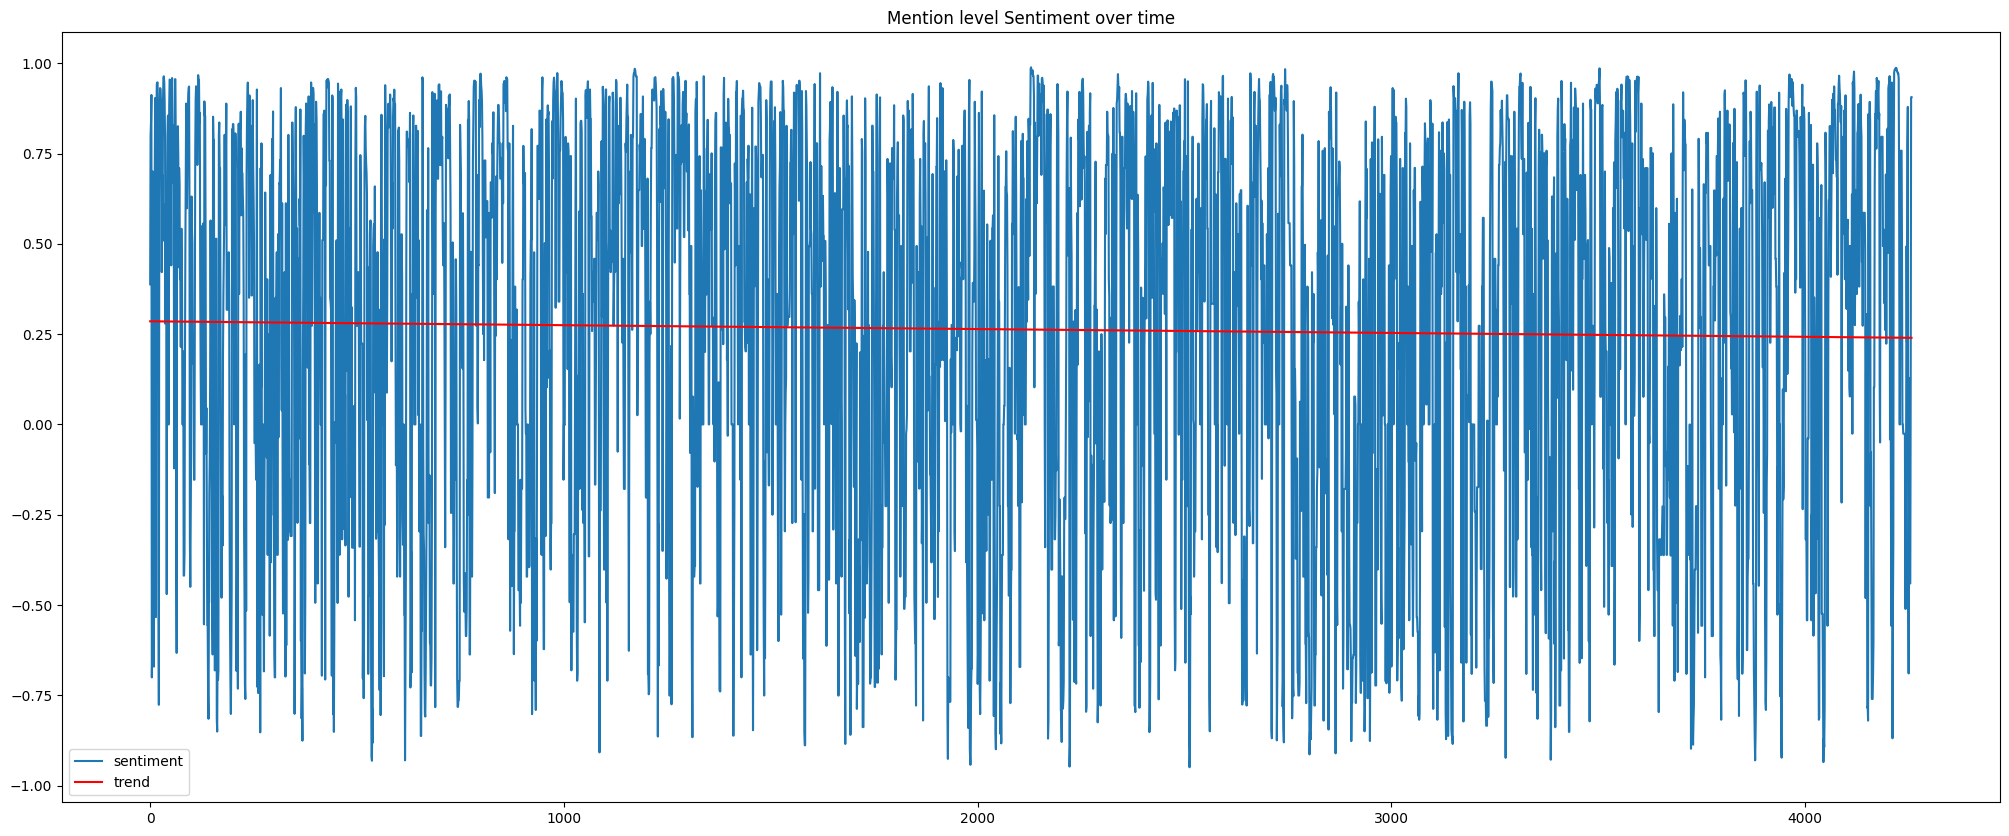

In [9]:
x = np.arange(len(sentiments_by_mentions))
slope, intercept = np.polyfit(x, sentiments_by_mentions, 1)

plt.plot(x, sentiments_by_mentions, label='sentiment')
plt.plot(x, slope*x + intercept, color='red', label='trend')
plt.title('Mention level Sentiment over time')
plt.legend()
plt.show()

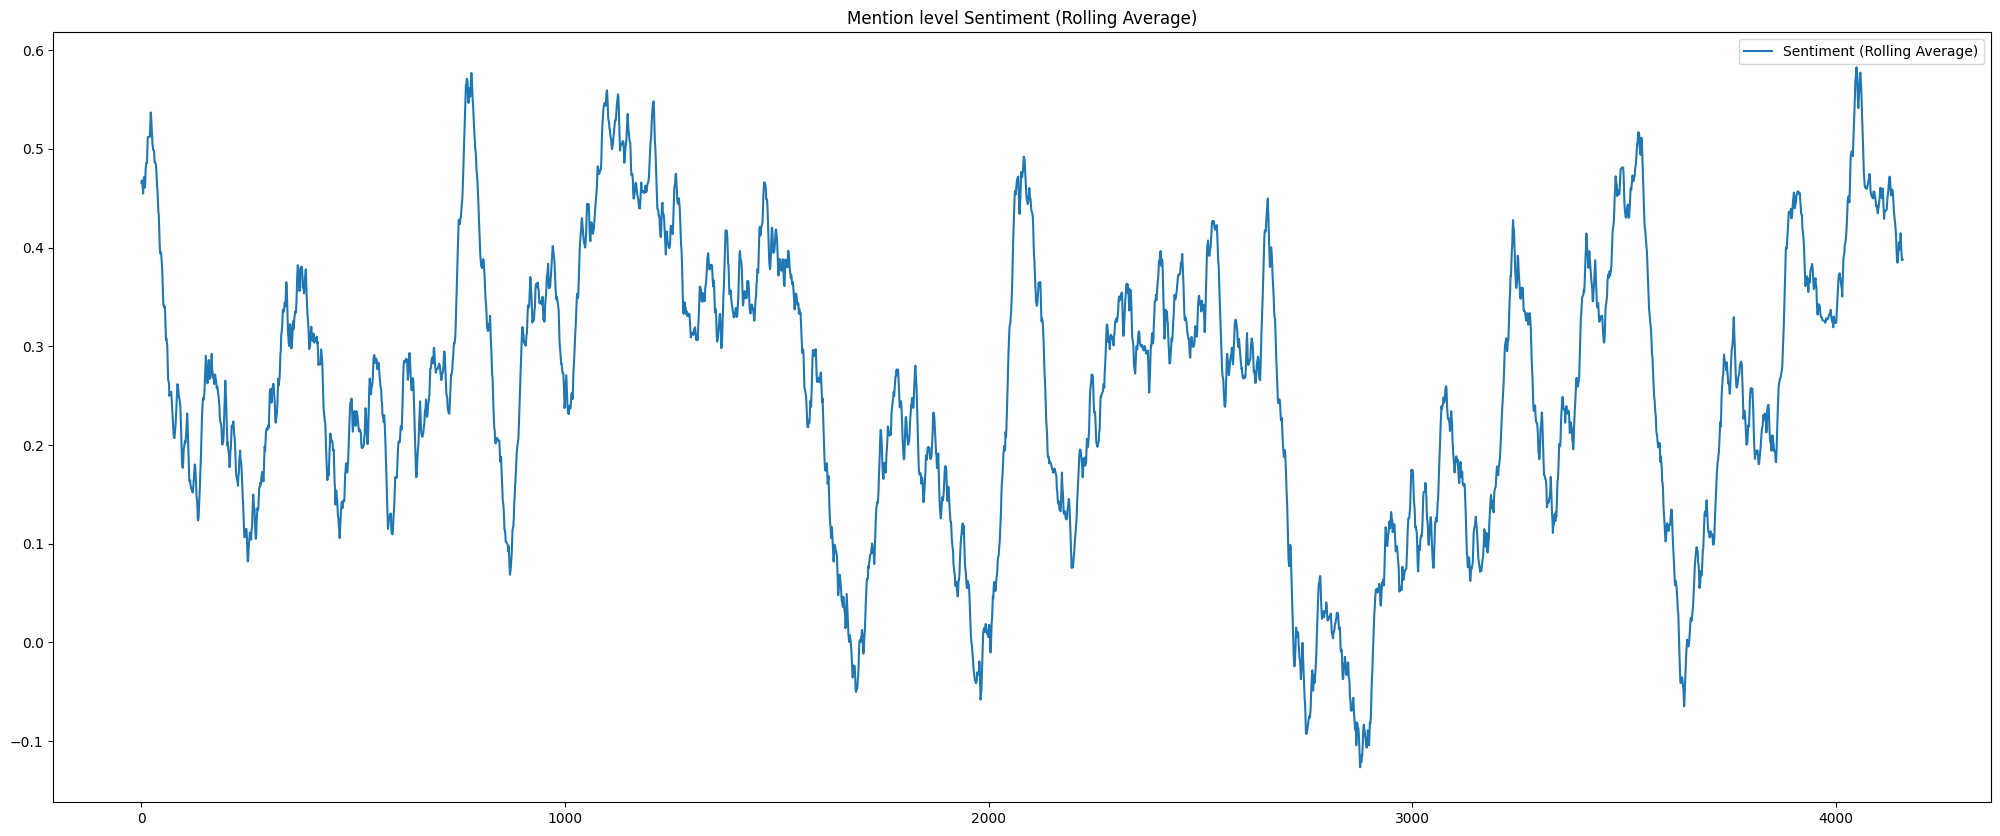

In [10]:
N = 100
rolling_average = pd.Series(sentiments_by_mentions).rolling(window=N).mean().iloc[N-1:].values

x = np.arange(len(rolling_average))

plt.plot(x, rolling_average, label='Sentiment (Rolling Average)')
plt.title('Mention level Sentiment (Rolling Average)')
plt.legend()
plt.show()

In [11]:
np.array(sentiments_by_mentions).shape

(4258,)